# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

/home/rcortez/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [181, 86, 325]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151,29627,18148,16745,4948,8550
1,22925,73498,32114,987,20070,903
2,32717,16784,13626,60869,1272,5609


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
The first customer represent Fresh products, customer could be a fresh market store, or some grocery store that includes a department in fresh products. 
The second customer represents Milk products, customer could be a dairy product store, or a business in the the ice cream industry. 
The third customer represents the Frozen products, customer could be a company that exports frozen foods to foreign countries. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [13]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
try:    
    new_data = data.copy()
    new_data.drop(['Milk'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*new_data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

#extract features columns
features_cols = list(new_data.columns)
#print features_cols

#extract target column, 1 correspond to column Milk
target_col = data.columns[1]
#print target_col

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn import cross_validation
X_all = data[features_cols]
y_all = data[target_col]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, test_size = 0.25, random_state = 40)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0)

# TODO: Report the score of the prediction using the testing set
#from sklearn.metrics import r2_score
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#print y_pred
#score = r2_score(y_test, y_pred)
#print "R2 score: " + str(score)
#from sklearn.metrics import accuracy_score
print "Accuracy Score: " + str(accuracy_score(y_test, y_pred))

Wholesale customers dataset has 440 samples with 5 features each.
Accuracy Score: 0.00909090909091


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
- Which feature did you attempt to predict? 
  - Milk
- What was the reported prediction score?
  - 0.00909. Since the score is negative (the model failed to fit the data) which could mean that product 'Milk' is relevant. In other words, since the purchase of the other categories do not explain the purchase of the product 'Milk' (target product), then Milk is a relevant (uncorrelated to the other products). 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

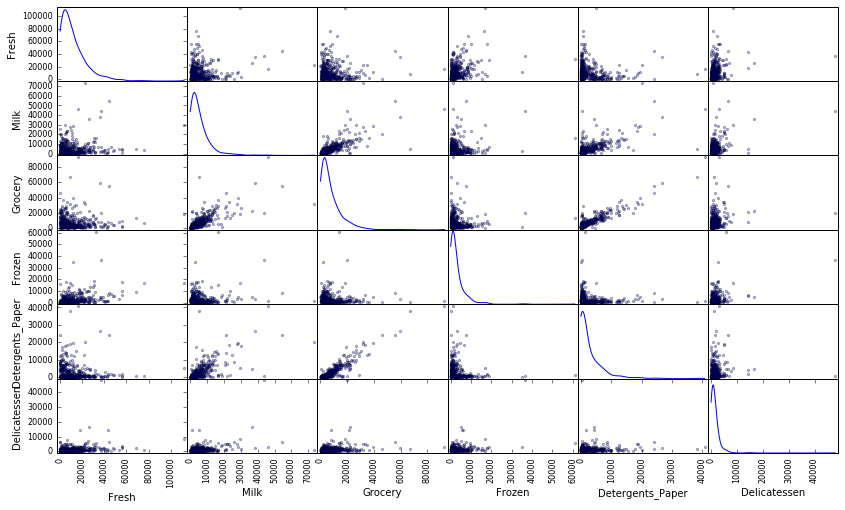

In [14]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
- The pair Grocery-Detergents_Paper exhibit a strong degree of correlation, Grocery-Milk and Detergents_Paper-Grocery also exhibit some degree of correlation. It is not clear whether or not the correlation exhibited between Grocery and Milk as it is displayed in the scatter plot can be explained by our DecisionTreeModel. The scatter plot certainly shows some degree of correlation but the model is not able to capture it. I would consider at this point either clean up the data some more or change the model (or the parameters). 
- How is the data for those features distributed? 
  - The data for the pair Grocery-Milk distribution are more dense around the origin with data points showing positive correlation as one of the features increaseS in the positive direction. There are also some outliers that do not show any correlation with the rest of the data. 
- Is the data normally distributed? 
  - The data is not normally distributed, it shows a degree of correlation between the features. 


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

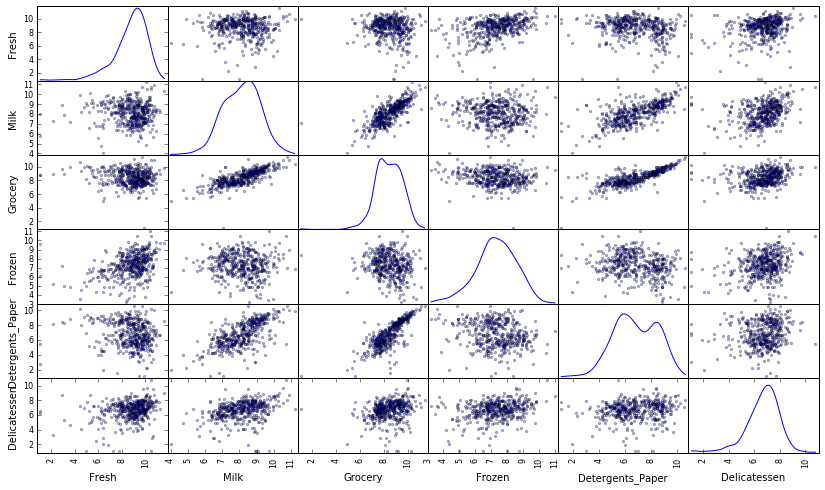

In [15]:
# TODO: Scale the data using the natural logarithm
log_data =np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples.copy())

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [16]:
# Display the log-transformed sample data
#display(log_data)
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
1,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
2,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [18]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature    
    #print data[feature]
    Q1 = np.percentile(data[feature], 25)
    #print Q1
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], 75)
    #print Q3
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    #print step
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    #print (log_data[feature])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
- No, there are not points considered outliers because the data has been previously logarighmically scaled. The logaritmic scaling has brought all the data values that falls within the 1.5 * IQR range. Taking logarithmic scaling does not always 'brings' the outliers to a reasonable range but in this case, given the distribution of the data, all the data was 'squeezed' within reasonable range. 
- If outliers were to exist, they should be removed because otherwise it could cause skewness in the distributions, which, when fed into our training models they would confused the model since outliers are not representative points of the data. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

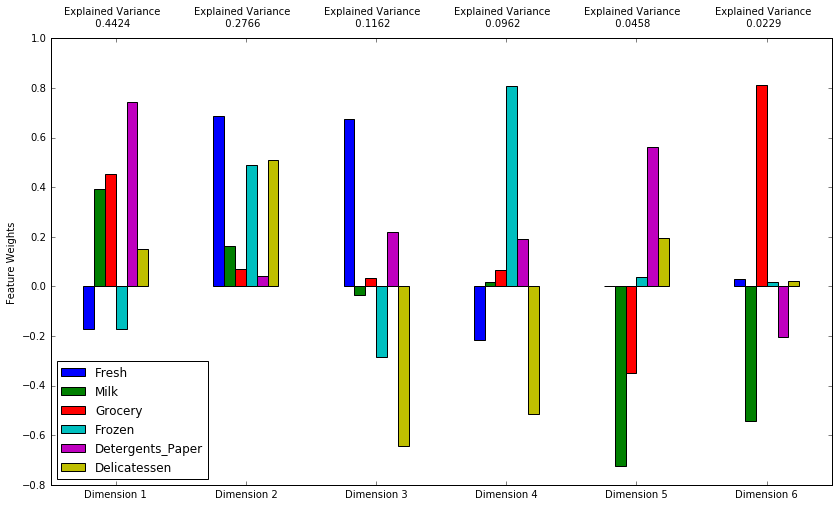

In [10]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
# set number of components (dimentsions)
pca = PCA(n_components = 6)
pca.fit(good_data)
# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
- How much variance in the data is explained in total by the first and second principal component?
  - 72% of the total variance is explained by the first and second principal components. 


- What about the first four principal components?
  - 0.4424 + 0.2766 + 0.1162 + 0.0962 = 0.9314 or 93.14% of the total variance in explained by the the first four principal components. 


- In terms of customer spending, the first four components explain the 93.14% of total variability of the spendings. The first dimension explains the 44.24% of the variability of the data, and it indicates that spending amounts from 'Fresh' and 'Frozen' move in the opposite directions. The features 'Detergents_Paper', 'Grocery' and 'Milk' have the 3 highest Feature Weights indicating that the projection onto this dimension is more representative for these features. The second dimension explains 27.66% of the variability and the spending amounts move in the same direction. Features 'Fresh', 'Frozen' and 'Detergent' are the most representative features on this dimension. The third dimention represents 11.62% of the variability of the data and indicates that spending amounts from 'Fresh' and 'Delicatessen' move in opposite directions. Similarly, the fourth dimension explains the 9.62% of the variability of the data and indicates that for this dimension, spending amounts from 'Frozen' and 'Delicatesse' move in different directions. 



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.1974,4.9048,0.0686,0.5623,-0.5195,-0.2369
1,4.2864,1.5364,1.5486,0.0945,-1.1282,-0.6965
2,0.7591,4.3062,-1.1439,1.7960,-0.8116,0.0902


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.1974,4.9048
1,4.2864,1.5364
2,0.7591,4.3062


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
- K-Means allows to cluster data based on some distance metric. It works by assigning data points to its closest mean. One advantage is that it always converges, also, it is straight forward (from the point of view that it doesn't use probabilities), also, it can use any distance metric. Gaussian Mixture Model clustering algorithm works similarly to K-Means but instead of doing a 'hard' cluster assigment for each data point, it does it in a probabilistic way. This 'soft' assignment computes the probability of each data point to belong to cluster. The advantage of this algorithm is that will not diverge, each point has its corresponding probability that belongs to its cluster and, it works with any distribution, not only Gaussians.  
- Which of the two algorithms will I use and why?
   - I would use K-Means because this approach would suffice the objective of understanding the variation in the different types of customer a wholesale distributor interacts with. I would expect that using K-Means would help me to better understand the data by computing the clusters, thus, indicating where the customer spendings are more dense. If subsequently, explaining of the spendings requires more analysis, like finding the distributions of the data and computing the probabilities that some customers belong to some clusters then I would consider Gaussian Mixture Model (EM).


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [14]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
for i in range(10,1,-1):
    kmeans = KMeans(n_clusters = i, n_init = 3, random_state = 4)
    clusterer = kmeans.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data, preds)
    #dframe = pd.DataFrame(i, columns = ['Num of Cluster', 'Slihouette Score'])
    print "cluster: ", i, ", score: ",  score

cluster:  10 , score:  0.349491430121
cluster:  9 , score:  0.345593616015
cluster:  8 , score:  0.353700051686
cluster:  7 , score:  0.35229939137
cluster:  6 , score:  0.346156105251
cluster:  5 , score:  0.34793287196
cluster:  4 , score:  0.333872503172
cluster:  3 , score:  0.395975286131
cluster:  2 , score:  0.419166083203


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
Number of clusters = 2


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

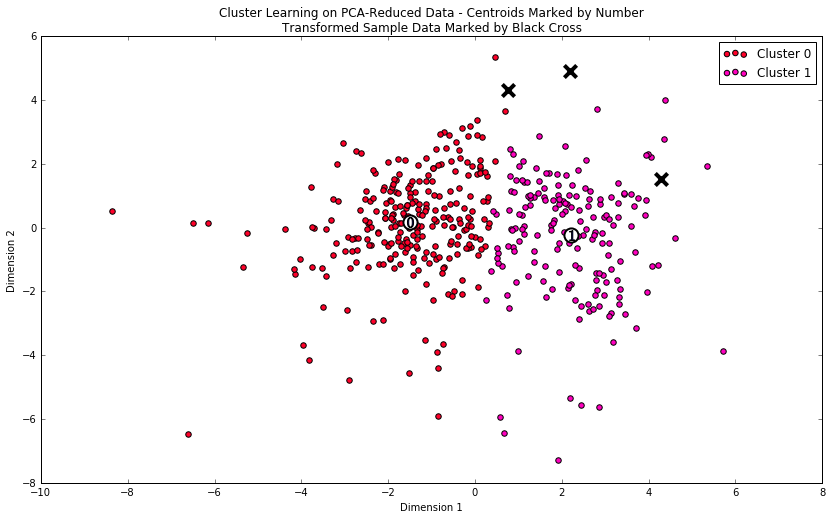

In [15]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [16]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8994.0,1909.0,2366.0,2081.0,290.0,681.0
Segment 1,3570.0,7749.0,12463.0,900.0,4567.0,966.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [17]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**
- When I pick the samples I choose the customer based on the highest spending costs for 'Fresh', 'Milk' and 'Frozen' respectively. From the case Sample 0, selected because its 'Fresh' category had the highest spending, I expected to be predicted in cluster 0 since cluster 0 (Segment 0) is more dominant in the 'Fresh' categories and it also has higher spending compared to cluster 1. The prediction was not consistent with this. 
- For the second sample, samples 1,  I expected it to be within cluster 1 because it was also chosen based on its high spending in 'Milk' and cluster 1 represents 'Milk', 'Grocery' and 'Detergent_Paper' high spendings. It was predicted as expected. 
- For the third sample, sample 2, which spending in category 'Frozen' was the highest among the customers, I expected it to be within cluster 0 (Segment 0), since it has higher value for 'Frozen' (2081) compared to cluster 1 'Frozen' category (900). This specific sample was harder to interpret because it seems that cluster 1 is related to higher end spendings, whereas cluster 0 seems to represent smaller businesses. But it we see the 2D cluster visualization, sample 3 is the X that seems to be right in the middle of cluster 0 and cluster 1. In other words, it is very close to be within cluster 1. 

## Conclusion

### Question 10
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether that change affects its customers positively or negatively. The wholesale distributor wants to consider changing its delivery service from 5 days a week to 3 days a week, but will only do so if it affects their customers positively. *How would you use the customer segments you found above to perform an A/B test for this change?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
- Provided that A is the control and B is the variation, out of the 6 categories 'Detergent_Paper' and 'Grocery' are the least prone to go wrong based on delivery is less often. Since segment 1 (cluster 1) represents larger spendings in 'Detergent_Paper' and 'Grocery', I would consider cluster 1 to be the variation (delivery 3 days a week). For B, the control, the delivery would stay 5 days a week, which makes some sense since spendings for category 'Fresh' are larger in cluster 0 (segment 0) and customer probably won't like the idea the fresh products are not delivered as often as they used to. 
- The change won't affect all customers equally, some customers will be affected, for instance spendings for category 'Milk' are higher for cluster 1, now 'Milk' will be delivered 3 days a week instead of 5 which might affect negatively to some customers. 
- The customers that affect the most are the ones that are in part of the B test (cluster 1), these customers represent 'Grocery' and 'Detergent' categories but some of them also spend considerable amounts in other products that would require 5 days a week delivery, like 'Fresh' foods. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a segment it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and has made estimates for each customer's annual spending of the six product categories. Knowing these estimates, the wholesale distributor wants to classify each new customer to one of the customer segments to determine the most appropriate delivery service.  
*Describe a supervised learning strategy you could use to make classification predictions for the ten new customers.*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**
- The additional feature I would add to help make a prediction is distance from the wholesale distributor to the delivery location. This would help because it would add an extra dimension that is not correlated to any of the other categories. By including distance, it implicitly includes some delivery costs in the form of time, which might be important to the distributor. It also provides important information regarding the extra resources needed for the ten new customers. For instance, some of these costs are driving hours, and truck maintenance, how many (if any) more trucks are needed, etc. The new classifier should model the optimal way to provide to as many customers as possible with a delivery service of 5 days as week and considering delivery service of 3 days a week to customer that won't be negatively affected by the reduction of the delivery frequency, all this considering the extra 'bandwidth' required to provide the service to 10 new customers. 
- For the classification, I would use SVM and Naive Bayes with and apply different parameters using GridSearch to find the most accurate classification. The partition for training and validation sets would be 75%, 25% of the data from file customer.csv. I would not take into factor the prediction time since there is not constrain on the time and it would probably be done few times. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

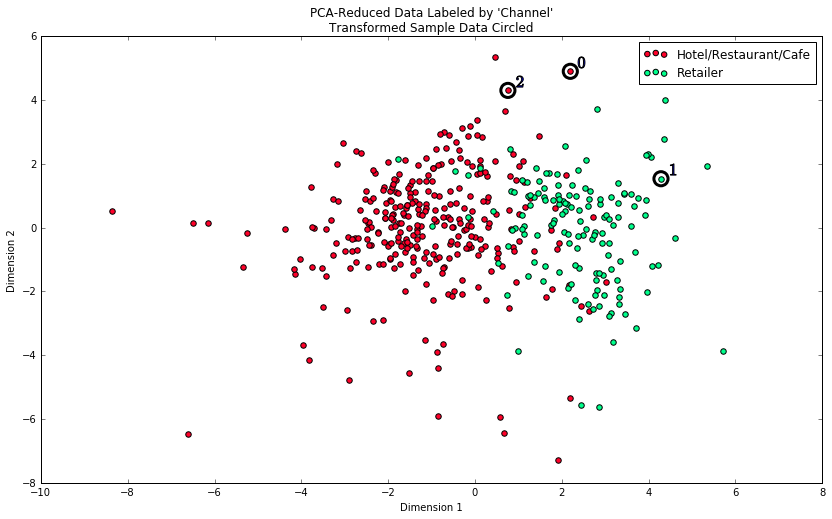

In [19]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
- The plot from the Cluster Visualization section seems very similar to the one above, the classes distributions are very close to each other. I noticed some points belong to different clusters, which could be caused either by the use of different algorithm, or parameters, or the introduction of the new feature, or the combbination of them. 
- The plot above shows some 'Retailer' customer scattered around the 'Hotel/Restaurants/Cafes' distribution and viceversa which indicates that even though the customer segments could be classified as 'Retailers' or 'Hotel/Restaurants/Cafes' it won't be purely classified as one or the other. 
- Would you consider these classifications as consisten with your previous definition of the customer segments?
  - Yes, they seem to be consistent in the sense that cluster 0 was representating the small to medium size retailer with lower spending costs which in this case turn out to be cafes, hotels, and restaurants. On the other side, cluster 1 was overall spendings higher than Q3 indicating larger businesses such as retail grocery store.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.